# AAlogorizer Example Sheet

### Imports

In [1]:
import pandas as pd
import AALogorizer
import StandardConfig

### Import File as pandas.DataFrame

In [2]:
# directory management
path, sep = StandardConfig.find_folderpath()
path, sep

('/home/freiherr/PycharmProjects/AAlogo', '/')

In [3]:
# import of test data sequences for visualization
test_data = pd.read_excel(f"{path}{sep}example_data{sep}DeepTMHMM_sub.xlsx")
test_data.head(5)

,Unnamed: 0,entry,name,gene_name,organism,dataset,length_seq,len_signal,start_pos_signal,stop_pos_signal,len_ecto,start_pos_ecto,stop_pos_ecto,len_TMD,start_pos_TMD,stop_pos_TMD,len_endo,start_pos_endo,stop_pos_endo,sequence
0,0,Q03157,APLP1_MOUSE,Aplp1,MOUSE,SUBEXPERT,654,38.0,1.0,38.0,546,39,584,21,585,605,49,606,654,MGPTSPAARGQGRRWRPPPLPLLLPLSLLLLRAQLAVGNLAVGSPS...
1,1,Q06481,APLP2_HUMAN,APLP2,HUMAN,SUBEXPERT,763,31.0,1.0,31.0,662,32,693,21,694,714,49,715,763,MAATGTAAAAATGRLLLLLLVGLTAPALALAGYIEALAANAGTGFA...
2,2,P05067,A4_HUMAN,APP,HUMAN,SUBEXPERT,770,17.0,1.0,17.0,683,18,700,21,701,721,49,722,770,MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMN...
3,3,P30530,UFO_HUMAN,AXL,HUMAN,SUBEXPERT,894,32.0,1.0,32.0,419,33,451,21,452,472,422,473,894,MAWRCPRMGRVPLAWCLALCGWACMAPRGTQAEESPFVGNPGNITG...
4,4,P35613,BASI_HUMAN,BSG,HUMAN,SUBEXPERT,385,20.0,1.0,20.0,303,21,323,21,324,344,41,345,385,MAAALFVLLGFALLGTHGASGAAGFVQAPLSQQRWVGGSVELHCEA...


#### important columns:
    start_pos_TMD
    stop_pos_TMD
    sequence

## How it works:

In [4]:
AALogorizer.AAlogoMaker.help()


        Description
        ___________
        AAlogoMaker is meant to ease the usage of AALogoGenerator
                        ________________________________________________________________________________________________
                        df: pd.DataFrame, name: str, column_seq: str, *args_position: str
                        df --> needs to contain the amino acid sequences = column_seq
                           --> needs at least one *args_position = name of column with alignment positions for 
                               sequences in column_seq
                        ________________________________________________________________________________________________
                        
        Callable Functions
        __________________
        single_mode() : application for sequence-propensity visualization based on a single alignment position
                        ______________________________________________________________________________________________

In [5]:
new_example = AALogorizer.AAlogoMaker(test_data, "Sub_DeepTMHMM", "sequence", "start_pos_TMD", "stop_pos_TMD")
                                        # df           name       column_seq          *args_position

Begin process:  13:38:26
End process:  13:38:30
Process time: 3.914 sec.


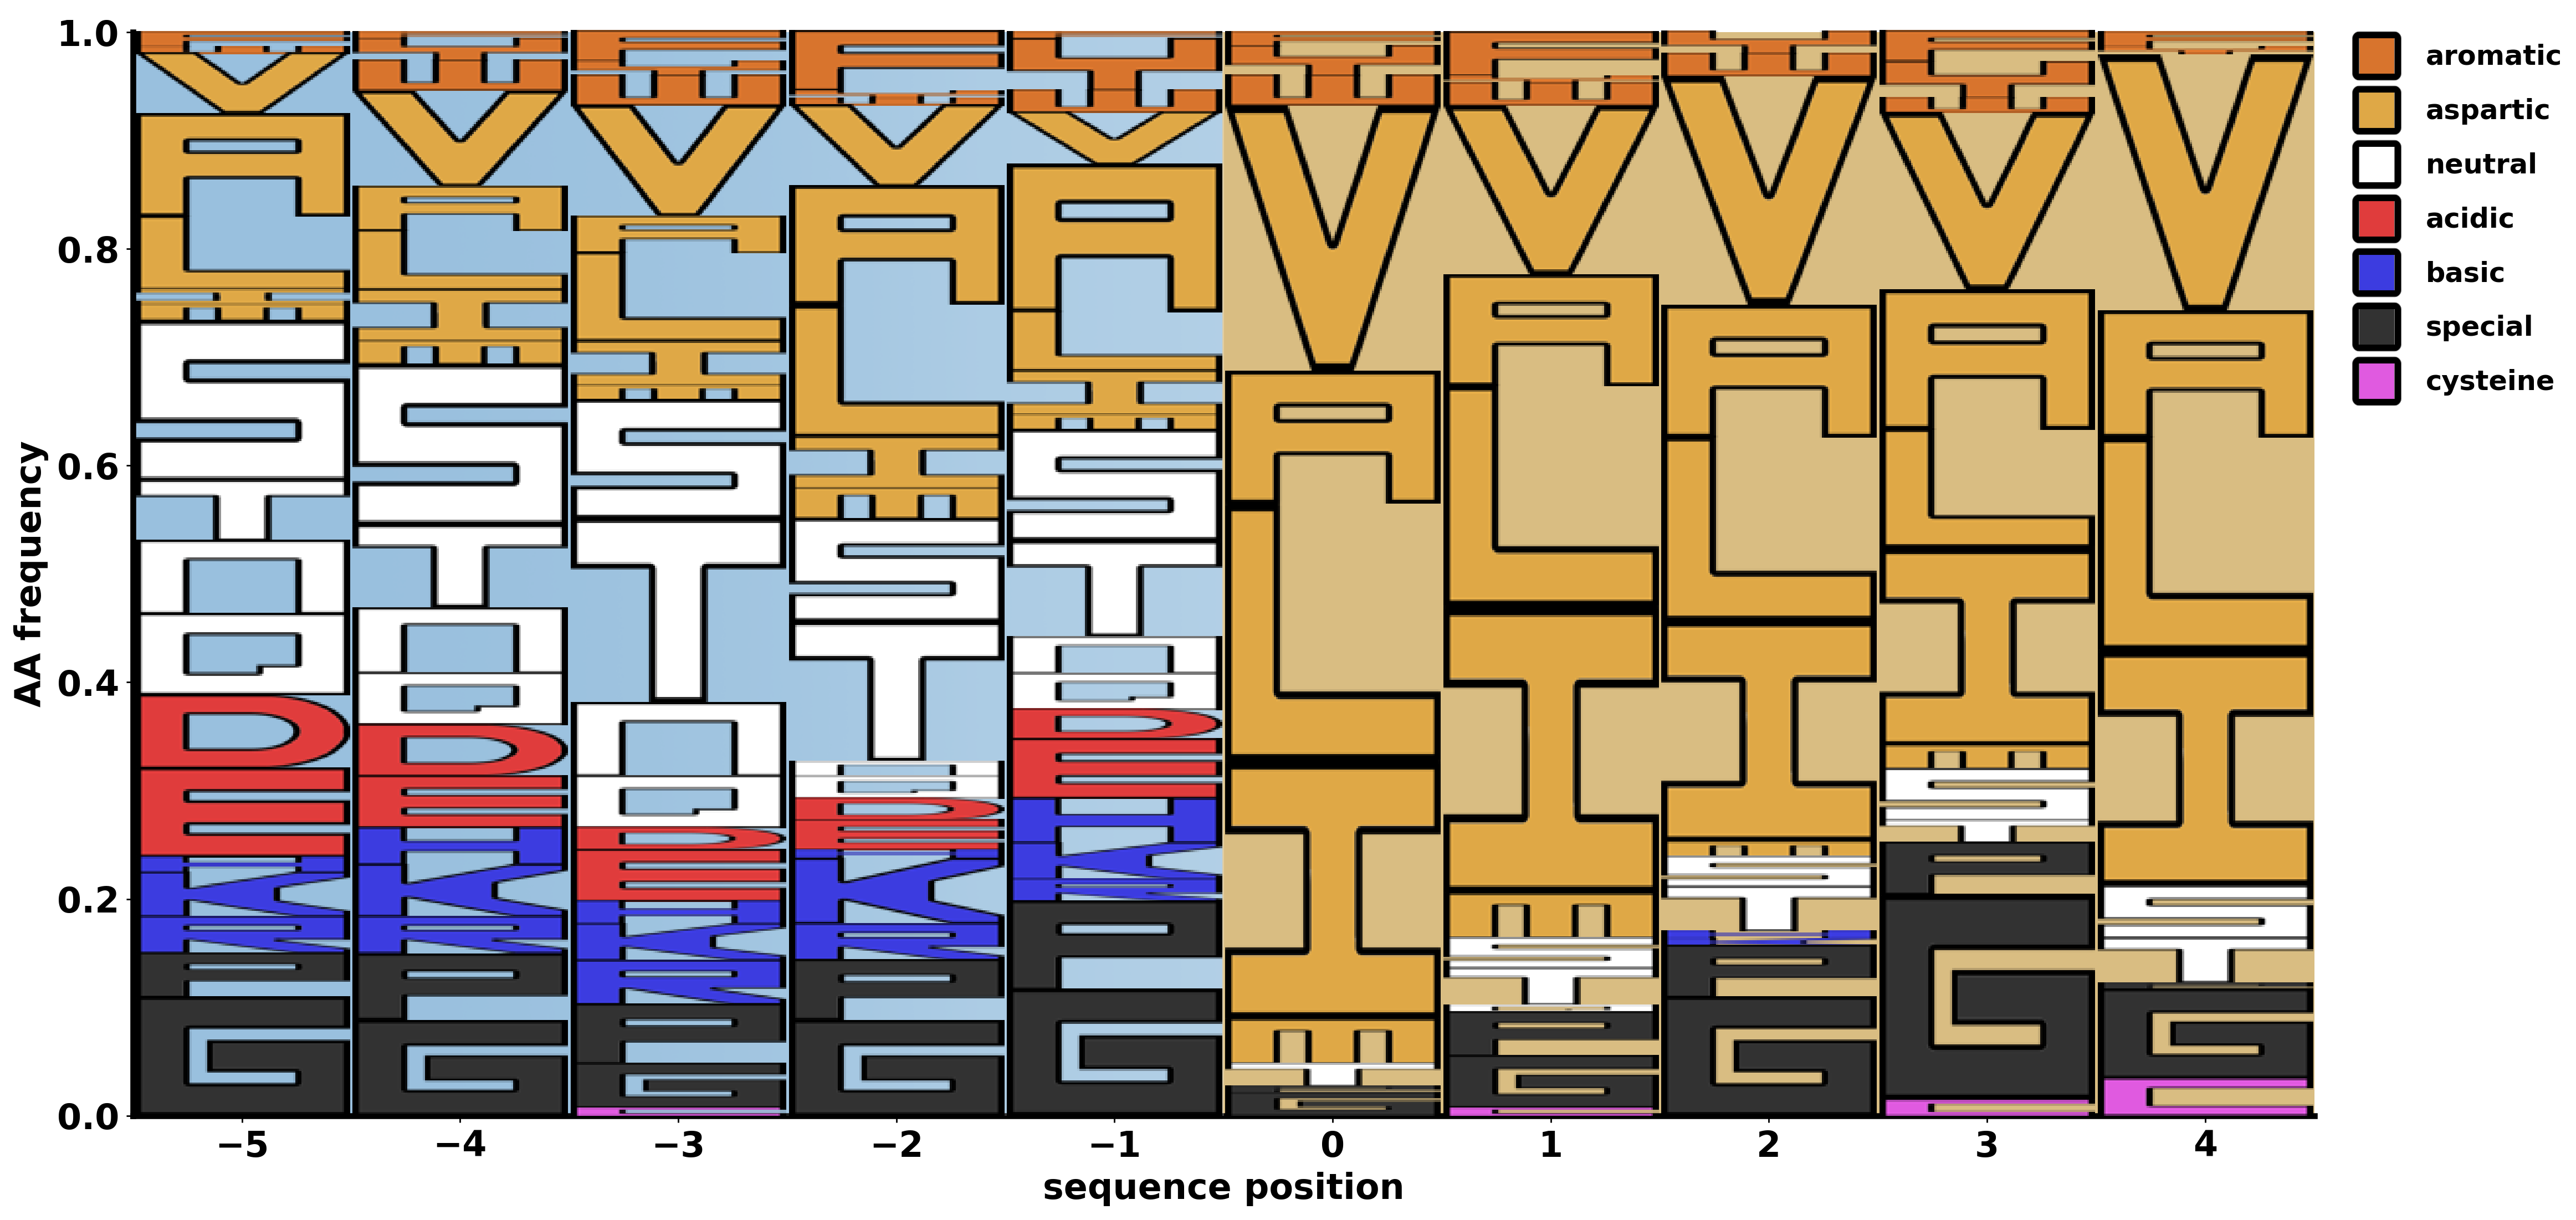

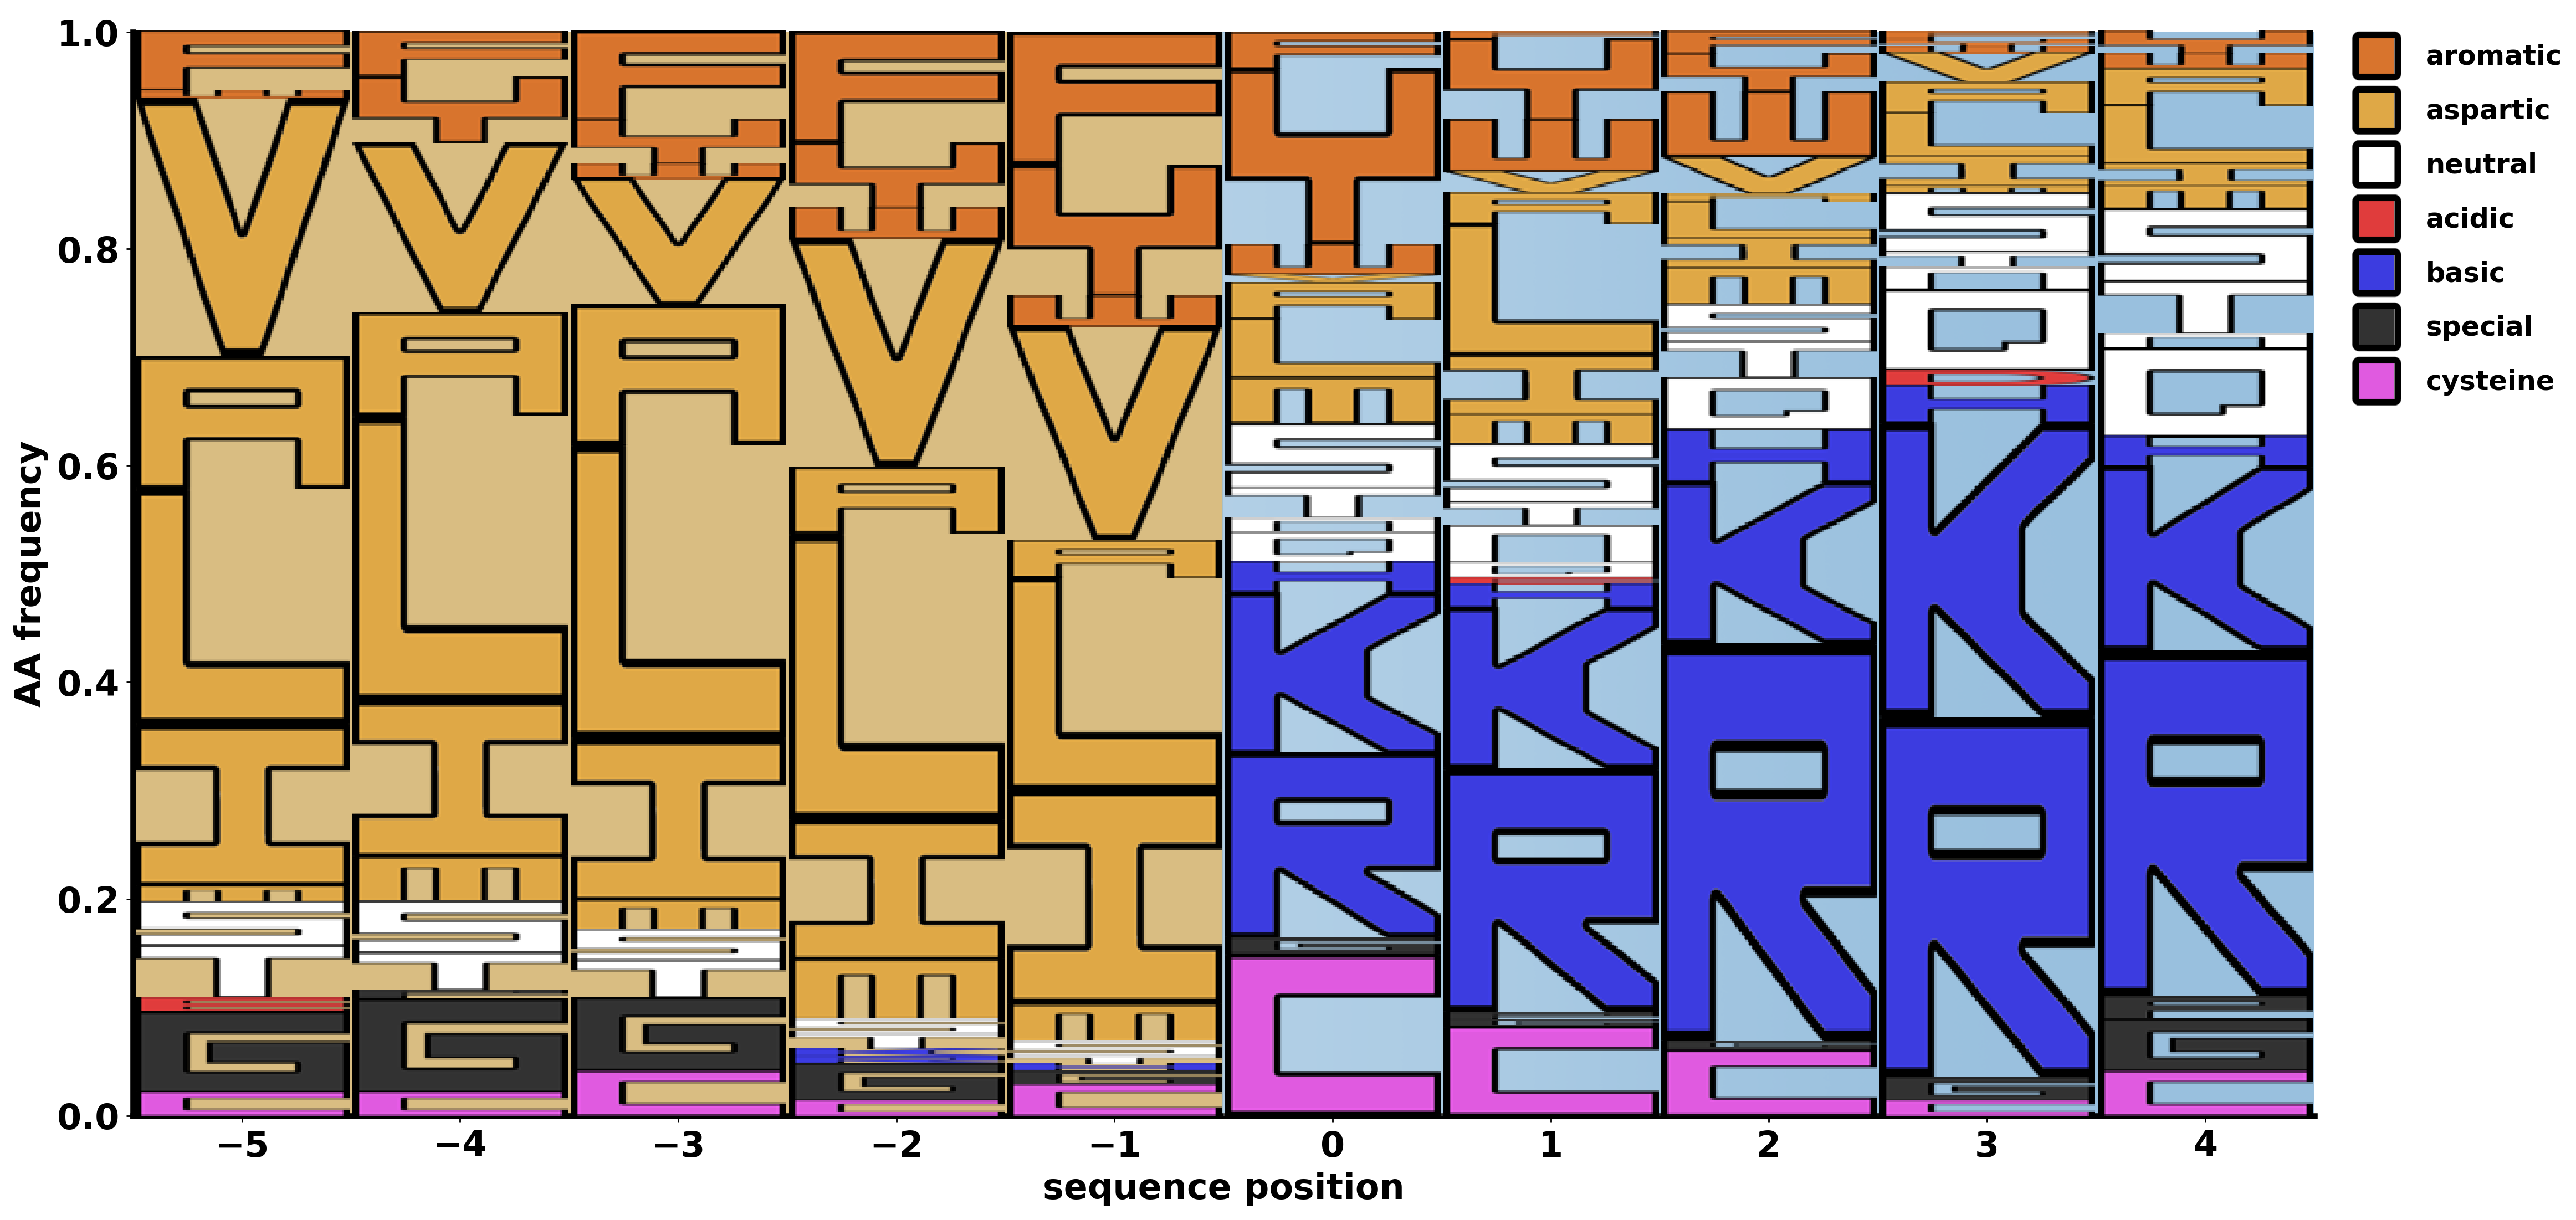

In [6]:
new_example.tmd_mode(config_name = "OG_AA_config")

In [7]:
new_example.tmd_mode.available_themes

['Kyte-Doolittle',
 'Hopp-Woods',
 'Cornette',
 'Eisenberg',
 'Rose',
 'Janin',
 'Engelman GES']

Begin process:  14:15:11
End process:  14:15:17
Process time: 5.633 sec.


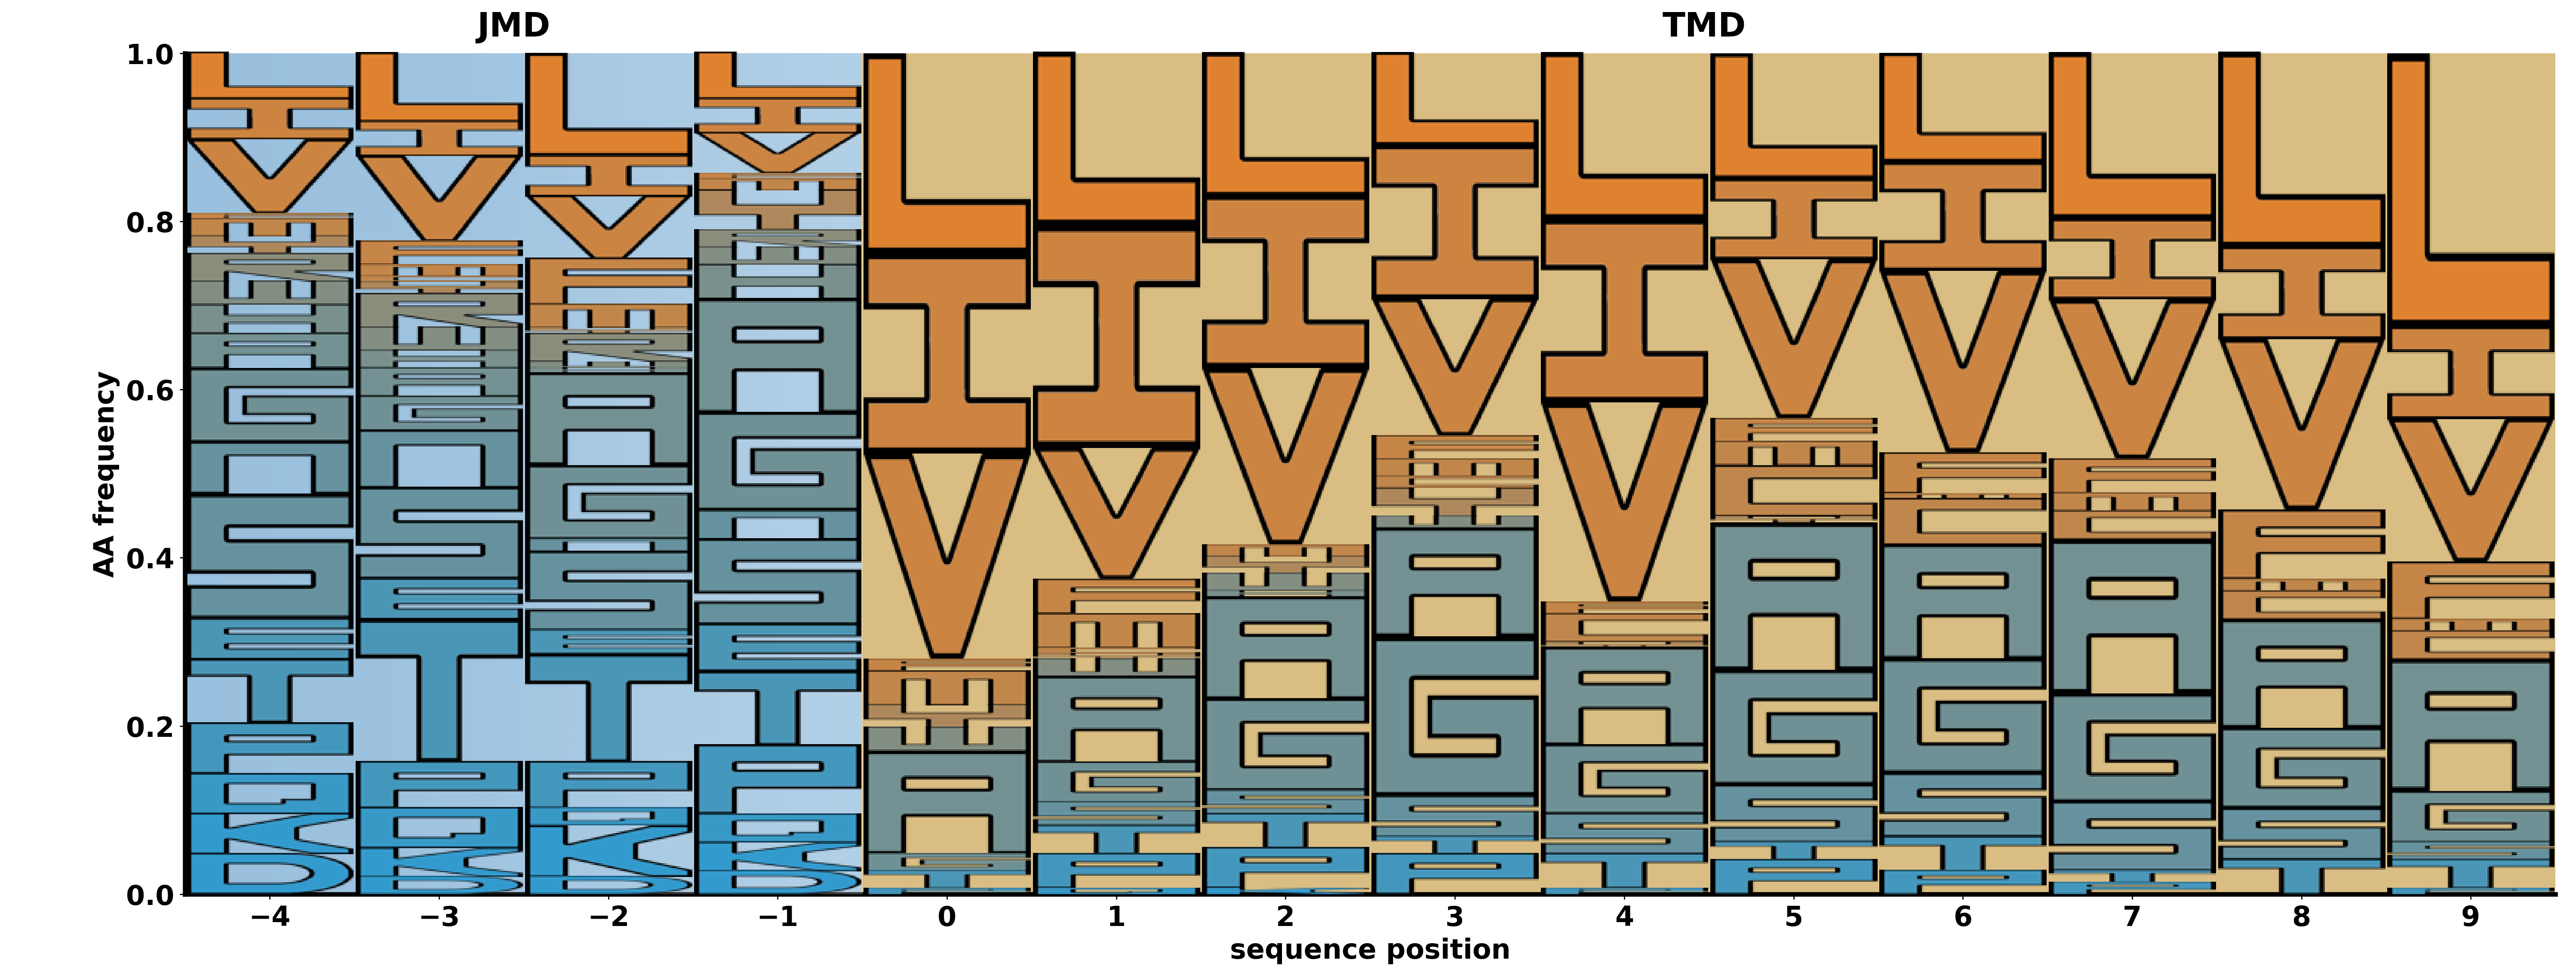

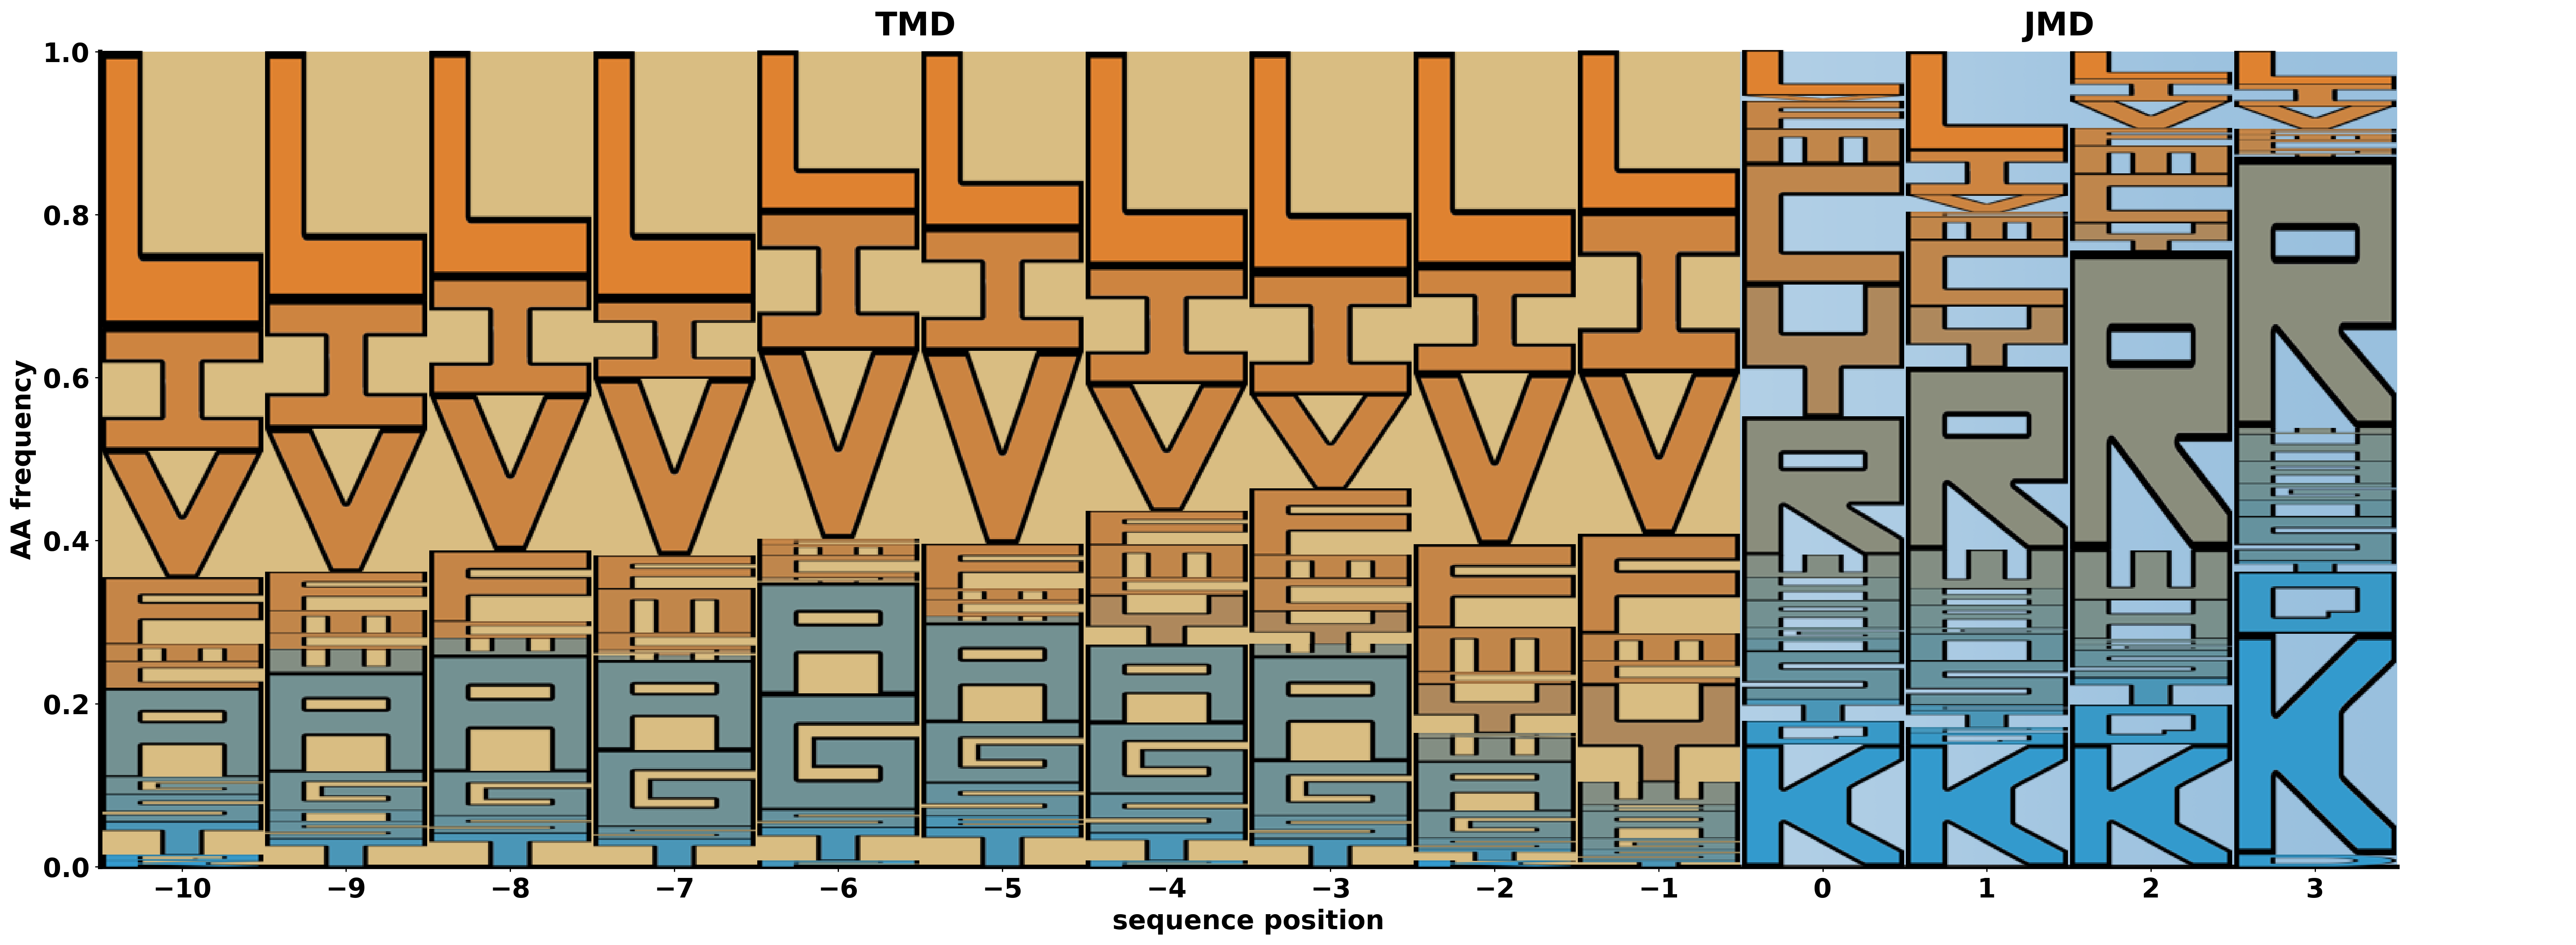

In [21]:
new_example.tmd_mode(theme="Cornette", aa_jmd=4, aa_tmd=10, headers = ["JMD", "TMD"])